# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

%matplotlib inline

In [2]:
path = '../data'
os.chdir(path)

df = pd.read_csv('step3_output.csv')

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
y = df['AdultWeekend']
predictors = df.drop(columns=['Name','AdultWeekend','state','summit_elev','base_elev'])
xscaled = StandardScaler().fit_transform(predictors)

x_train,x_test,y_train,y_test = train_test_split(xscaled,y,train_size=0.75,test_size=0.25,random_state=1)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

features = pd.DataFrame(dict(zip(predictors.columns,model.coef_)),index=[0]).T
features

,0
vertical_drop,1.528659
trams,-0.001206
fastEight,0.161721
fastSixes,0.918357
fastQuads,1.348403
quad,1.381208
triple,1.418660
double,0.387678
surface,-1.343309
total_chairs,0.968718


In [6]:
model.coef_

array([ 1.52865883e+00, -1.20643479e-03,  1.61720668e-01,  9.18356921e-01,
        1.34840253e+00,  1.38120798e+00,  1.41865981e+00,  3.87678178e-01,
       -1.34330949e+00,  9.68717557e-01,  2.31073214e-01, -1.74867495e-01,
       -2.95028371e-03, -3.89645674e+00, -9.61671498e-01,  1.37122959e+00,
       -5.35354384e-01, -1.17078270e+00,  1.97479223e+01, -7.07628062e-01,
        9.96678377e-01, -4.69157337e-01])

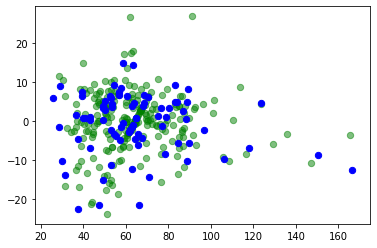

In [7]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,c='g',s=40,alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,c='b',s=40)

In [8]:
e_var = explained_variance_score(y_test,y_pred,multioutput='raw_values')
mae = mean_absolute_error(y_test,y_pred)
e_var,mae

(array([0.9143633]), 5.926065699064924)

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [9]:
df[df['summit_elev']==6817].T # it appears that this one is the 'Big Mountain resort discussed in step 1'

,151
Name,Whitefish Mountain Resort
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3
quad,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [10]:
x_bm = xscaled[151]

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [11]:
price_pred = lm.intercept_+lm.coef_@x_bm
price_pred

85.00045314907906

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [12]:
df[df['Name']=='Whitefish Mountain Resort']['AdultWeekend']

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [13]:
#cluster analysis
df.groupby('Clusters').mean().T

Clusters,0,1,2
summit_elev,10894.071429,1898.925743,7245.125000
vertical_drop,2314.125000,771.613861,1606.027778
base_elev,8597.642857,1108.163366,5668.097222
trams,0.625000,0.079208,0.083333
fastEight,0.017857,0.000000,0.000000
fastSixes,0.607143,0.099010,0.097222
fastQuads,3.000000,0.445545,1.083333
quad,1.053571,1.019802,0.597222
triple,2.125000,1.341584,1.458333
double,1.964286,1.702970,2.097222


**There appears to be three distinct clusters which buckets resorts into three distinct segments with different prices/selling points as well as cost concerns**
1. cheapest prices, shortest number of days open on average, fewest runs, vertical drop and skiiable area indicate a casual resort experience target market segment

2. highest prices justified by most runs, highest number of days open last year and total chairs by far as well as most snow made and skiable terrain

3. A compromise between the first two clusters with middle road number of runs, skiable terrain and price. Surprising this cluster also has the greatest area for night skiing

**Due to the cost of maintaining more lifts, skiable area over a greater number of days on top of the highest elevantion, cluster 1 has the highest weekend price of the three**

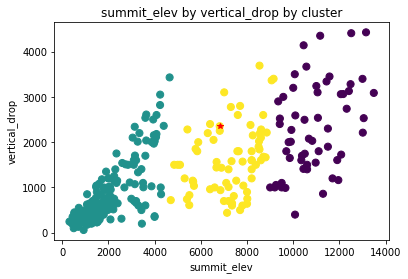

In [14]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.plot(df['summit_elev'][151], df['vertical_drop'][151], 'r*')
plt.savefig('../figures/fig1.png',bbox_inches='tight')

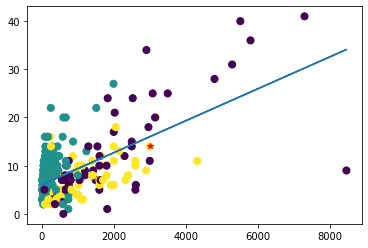

In [15]:
#argument for necessity for additional chairlifts to accomodate guests in order to ensure good experience
plt.scatter(df['SkiableTerrain_ac'], df['total_chairs'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.plot(df['SkiableTerrain_ac'][151], df['total_chairs'][151], 'r*')
plt.plot(df['SkiableTerrain_ac'], np.poly1d(np.polyfit(df['SkiableTerrain_ac'], df['total_chairs'], 1))(df['SkiableTerrain_ac']))
plt.savefig('../figures/fig2.png',bbox_inches='tight')

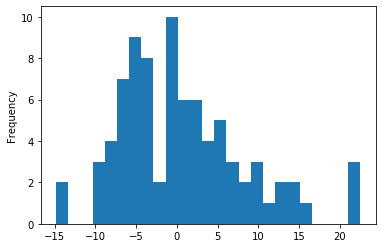

In [16]:
#generally real prices are underestimated by the model even though the estimated price for our resort is still higher than the actual price today
## this shows we definitely have a strong case to increase price in our segment of market

price_gap = y_test-y_pred
price_gap.plot(kind='hist',bins=25)
y_test.mean()-y_pred.mean()
plt.savefig('../figures/fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [17]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, '../models/regression_model_adultweekend.joblib') 

['../models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [18]:
coefficients = pd.DataFrame(features)
coefficients

,0
vertical_drop,1.528659
trams,-0.001206
fastEight,0.161721
fastSixes,0.918357
fastQuads,1.348403
quad,1.381208
triple,1.418660
double,0.387678
surface,-1.343309
total_chairs,0.968718


In [19]:
performance_metrics=pd.DataFrame(dict(zip(['Model Intercept','R Squared','MSE'],[model.intercept_,e_var[0],mae])),index=[0])

In [20]:
performance_metrics

,Model Intercept,R Squared,MSE
0,63.994179,0.914363,5.926066
